In [257]:
import numpy as np
import matplotlib.pyplot as plt
grid = np.zeros((20, 20, 3))

In [258]:
ratCoords = [0.1, 0.1]

In [259]:
print(ratCoords)

[0.1, 0.1]


In [260]:
direction = np.random.random_integers(8)
print(direction)

7


In [261]:
minCoords = [0, 0]
maxCoords = [1, 1]

def detectCollision(coords):
    return coords[0] < minCoords[0] or coords[1] < minCoords[1] or coords[0] > maxCoords[0] or coords[1] > maxCoords[1]

print(detectCollision([-0.1, 0.2]))
print(detectCollision([0.1, -0.2]))
print(detectCollision([1.1, 0.2]))
print(detectCollision([0.1, 1.2]))
print(detectCollision([0.1, 0.2]))
print(detectCollision([-0.1, -0.2]))
print(detectCollision([-1.1, 1.2]))

True
True
True
True
False
True
True


In [262]:
l = 0.03
diagonalDelta = math.sqrt(l**2/2)
print('diagonal travel distance: ', diagonalDelta)
positionDeltas = np.array([[0, -l], [diagonalDelta, -diagonalDelta], [l, 0], [diagonalDelta, diagonalDelta], [0, l], [-diagonalDelta, diagonalDelta], [-l, 0], [-diagonalDelta, -diagonalDelta]])
print('travel vectors by direction: ', positionDeltas)
def updatePosition(currentCoords, direction):
    return currentCoords + positionDeltas[direction-1]

diagonal travel distance:  0.021213203435596427
travel vectors by direction:  [[ 0.        -0.03     ]
 [ 0.0212132 -0.0212132]
 [ 0.03       0.       ]
 [ 0.0212132  0.0212132]
 [ 0.         0.03     ]
 [-0.0212132  0.0212132]
 [-0.03       0.       ]
 [-0.0212132 -0.0212132]]


[[0.0787868 0.0787868]
 [0.1       0.07     ]
 [0.1212132 0.0787868]
 [0.13      0.1      ]
 [0.1212132 0.1212132]
 [0.1       0.13     ]
 [0.0787868 0.1212132]
 [0.07      0.1      ]
 [0.0787868 0.0787868]]


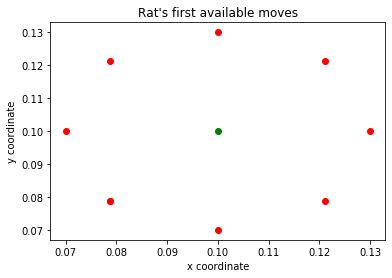

In [263]:
firstMoves = np.array([updatePosition(startingPosition, i) for i in range(0, 9)])
print(firstMoves)

plt.plot(firstMoves[:, 0], firstMoves[:, 1], 'ro')
#plt.axis([0, 1, 0, 1])
plt.plot([0.1], [0.1], 'go')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Rat\'s first available moves')
plt.show()

In [264]:
currentPosition = startingPosition
history = np.array([currentPosition])
collisions = np.array([])
iteration = 0
restart = 0
while iteration < 100000:
    if (restart == 1):
        restart = 0
        iteration += 1
        currentPosition = startingPosition
        history = np.append(history, [currentPosition], axis=0)
        collisions = np.append(collisions, False)
        continue
    newDirection = math.floor(np.random.random_integers(8)) #geometric(p=0.15) % 8 + 1)
    currentPosition = updatePosition(currentPosition, newDirection)
    history = np.append(history, [currentPosition], axis=0)
    hasCollision = detectCollision(currentPosition)
    collisions = np.append(collisions, hasCollision)
    if (hasCollision):
        restart = 1
    iteration += 1


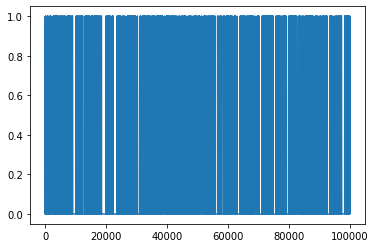

In [265]:
plt.plot(collisions)

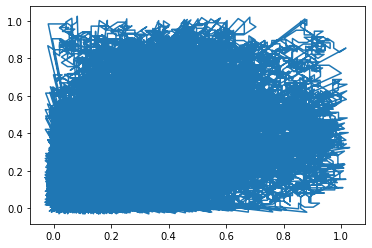

In [266]:
plt.plot(history[:, 0], history[:, 1])

In [267]:
history

array([[0.1      , 0.1      ],
       [0.1      , 0.07     ],
       [0.0787868, 0.0487868],
       ...,
       [0.1      , 0.13     ],
       [0.0787868, 0.1087868],
       [0.0787868, 0.0787868]])

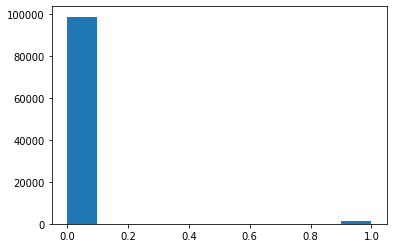

In [268]:
plt.hist(collisions)
plt.show()